In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

* ## numpy 与矩阵运算

In [6]:
# [m1, n1] dot [m2, n2] -> [m1, n2]
# eg: [1, 4] dot [4, 1] -> [1, 1]
A = np.linspace(1, 10, 4) # 根据起止数据等间距地生成数组 
B = np.linspace(1, 10, 4)
A = A.reshape(1, -1)
B = B.reshape(4, -1)
## 矩阵的乘法
C = np.dot(A, B)

## 对应元素相乘 
C = np.multiply(A, B)
C = np.log(A) # log下什么都不写默认是自然对数
print(A)
print(B)
print(C)

[[ 1.  4.  7. 10.]]
[[ 1.]
 [ 4.]
 [ 7.]
 [10.]]
[[0.         1.38629436 1.94591015 2.30258509]]


* # matplotlib

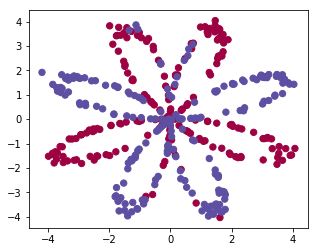

In [14]:
# 散点图
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

X, Y = load_planar_dataset()
X = X.reshape(2, -1)
Y = Y.reshape(Y.size, )
# 可视化数据
p = plt.scatter(X[0, :], X[1, :], c=Y.reshape(Y.size), s=40, cmap=plt.cm.Spectral, marker='o')

In [21]:
X = np.random.rand(2, 3)
W1 = np.random.rand(4, 2)
W2 = np.random.rand(1, 4)
b1 = np.zeros((4, 1))
b2 = np.zeros((1, 1))
Z1 = np.dot(W1, X) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2, A1) + b2
Z2

array([[1.30264622, 1.62899195, 0.23623178]])

# pandas
import pandas as pd


col1  col2  col3  col4  col5  col6  col7  col8  col9
0     8     2     3     3     2     5     4     2     4
1     6     4     8     7     9     2    10     3     9
          col2      col3      col4      col5      col6      col7
col2  1.000000  0.085311  0.052846 -0.002524 -0.143509  0.087536
col3  0.085311  1.000000  0.073381 -0.023252  0.043438  0.021206
col4  0.052846  0.073381  1.000000  0.001287 -0.092752  0.198374
col5 -0.002524 -0.023252  0.001287  1.000000  0.213717 -0.039797
col6 -0.143509  0.043438 -0.092752  0.213717  1.000000  0.058192
col7  0.087536  0.021206  0.198374 -0.039797  0.058192  1.000000


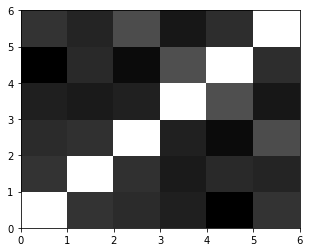

In [18]:
import pandas as pd
from pandas import DataFrame
import random
# 定义一个DataFrame
cols = ['col{i}'.format(i=i) for i in range(1, 10)]
values = [[random.randint(1, 10) for _ in range(1, 100)] for i in range(1, 10)]
d = dict(zip(cols, values))
dataFrame1 = DataFrame(data=d)
print(dataFrame1.head(2))
cor = DataFrame(dataFrame1.iloc[:, 1:7].corr()) # 计算相关系数
print(cor)
plt.pcolor(cor)
plt.show()